## 주성분 분석(PCA, Pricipal Component Analysis): 차원축소모델

In [ ]:
# 주성분(주요 구성요서, 특성 분석) PCA라고도 합니다
# -대표적인 차원축소 모델
# - 지도/ 비지도 모두 사용가능
# - 특성이 많으면 훈련모델의 성능은 높지만, 과대적합 될 가능성 커짐
# 이때, 차원축소를 이용하면 성능을 유지하면서 속도를 높일 수 있음

### <차원축소>
# - 데이터를 가장 잘 나타내는 일부 특성을 선택
# - 데이터 크기(특성)을 줄이면서 학습모델의 성능ㅇ르 향상시키는 방법
# - 축소된 차원을 다시 원본 차원으로 손실을 최소화 하면서 복원 가능

### <장점>
# - 대량의 데이터를 이용하여 모델 훈련 시에 시간이 오래 걸리는 경우 적용해 볼수 있음
# - 훈련시간 개선 및 성능 유지 또는 향상 가능

## PCA 클래스 모델 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [5]:
# .npy : numpy 기반의 배열 데이터
# - npy 파일은 numpy에서 load() 함수를 통해 읽어들이기
# - npy는 numpy기반의 기본  포맷파일 
fruits = np.load('./data/09_fruits_300.npy')

# 첫번째 축 : 300개 행
# 두번째 축 : 100개 열
# 세번째 축 : 깊이 100개 ( 실제 데이터가 들어있는 곳)
print(fruits.shape)

#300행의 10000열로 변환
fruits_2d = fruits.reshape(300,100*100)
print(fruits_2d.shape)

(300, 100, 100)
(300, 10000)


In [7]:
df= pd.DataFrame(fruits_2d)
df

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
1,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
2,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
3,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,1,1,1,1,1,1,1,1,1,3,...,1,1,1,1,1,1,1,1,1,1
296,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
297,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
298,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [10]:
# 사용하는 패키지 : sklearn.decomposition
# 사용하는 클래스(모델) : PCA
from sklearn.decomposition import PCA

# 클래스 (모델) 생성하기
# n_components : 주성분의 갯수를 지정(찾을 주성분 갯수) 
# 클래스 생성시 최초에 무조건 지정해 주어야 합니다
# 300개 중에 50개 
pca = PCA(n_components=50)

# 훈련모델 생성하기
pca.fit(fruits_2d)

PCA(n_components=50)

In [11]:
# 찾은 주성분 조회하기
print(pca.components_.shape)

(50, 10000)


In [13]:
def draw_fruits(arr, ratio=1):
    n = len(arr)
    rows=int(np.ceil(n/10))
    cols=n if rows<2 else 10
    
    fig, axs = plt.subplots(rows, cols, figsize=(cols*ratio,rows*ratio),
                           squeeze=False)
    
    for i in range(rows):
        for j in range(cols):
            if i*10+j <n :
                axs[i,j].imshow(arr[i*10+j],cmap='gray_r')
            axs[i,j].axis('off')
plt.show()

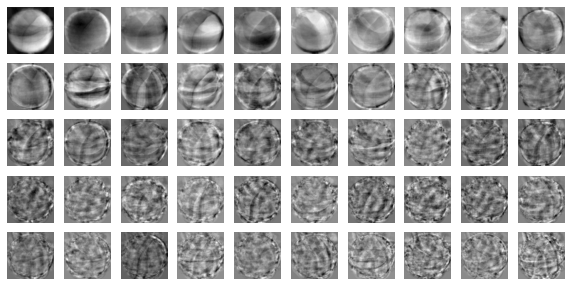

In [14]:
draw_fruits(pca.components_.reshape(-1,100,100))

In [16]:
print(fruits_2d.shape)

(300, 10000)


## 차원 축소하기 --> 데이터 전처리라고 생각하세요

In [18]:
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)

(300, 50)


## 원본 데이터 재구성

In [19]:
fruits_inverse = pca.inverse_transform(fruits_pca)
print(fruits_inverse.shape)

(300, 10000)


In [20]:
# 2D -> 3D 변환
# 원본 차원과 동일하게
fruits_reconstruct = fruits_inverse.reshape(-1,100,100)
print(fruits_reconstruct.shape)

(300, 100, 100)


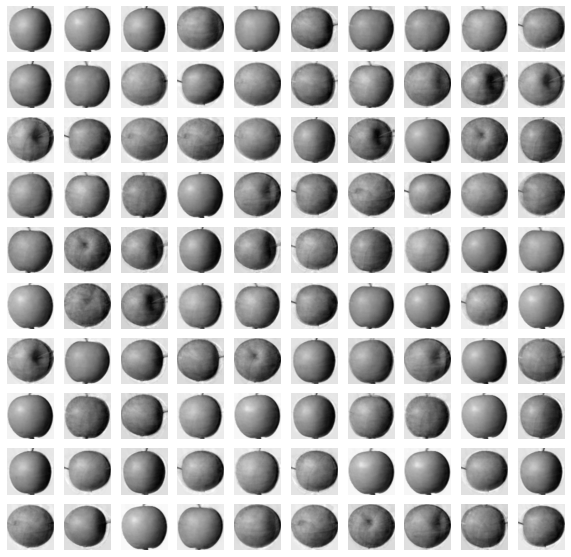

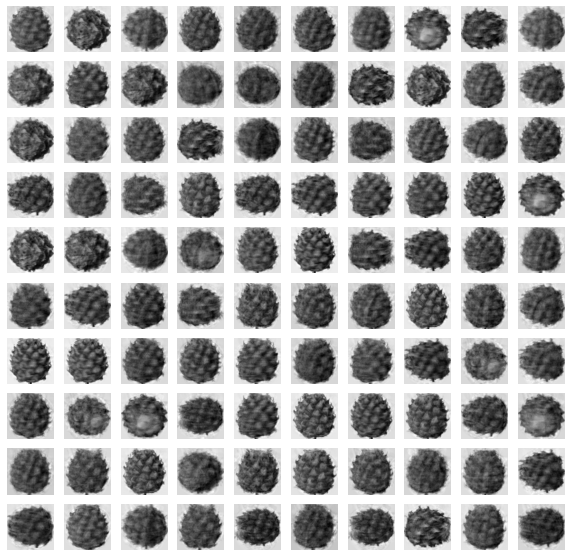

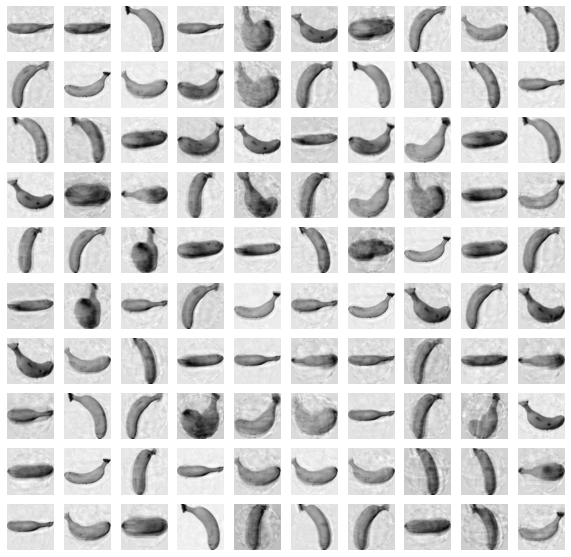

In [22]:
for start in [0,100,200]:
    draw_fruits(fruits_reconstruct[start : start + 100])
    print('\n')

## KMeans 모델에 차원축소 데이터 적용하기


In [25]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3, random_state=42)
km.fit(fruits_pca)

KMeans(n_clusters=3, random_state=42)

In [26]:
print(np.unique(km.labels_,return_counts=True))

(array([0, 1, 2]), array([111,  98,  91], dtype=int64))


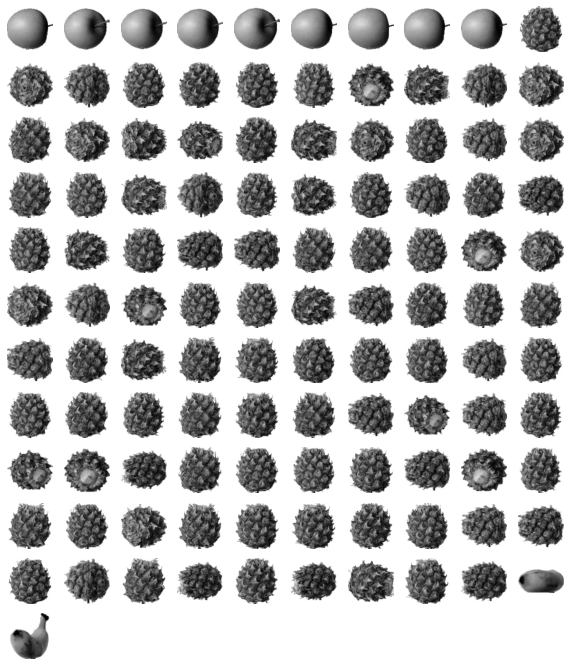

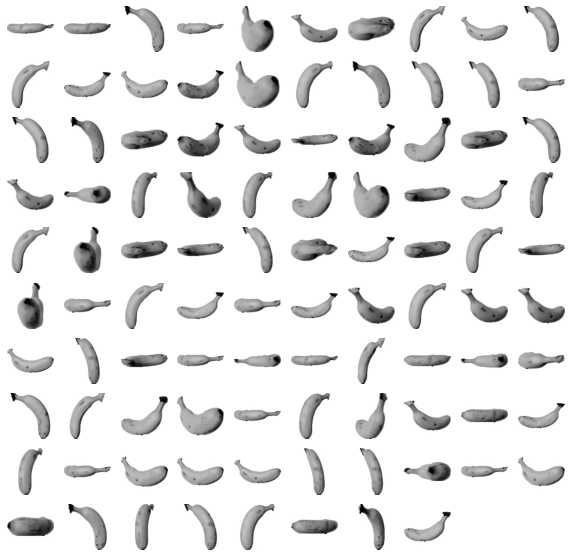

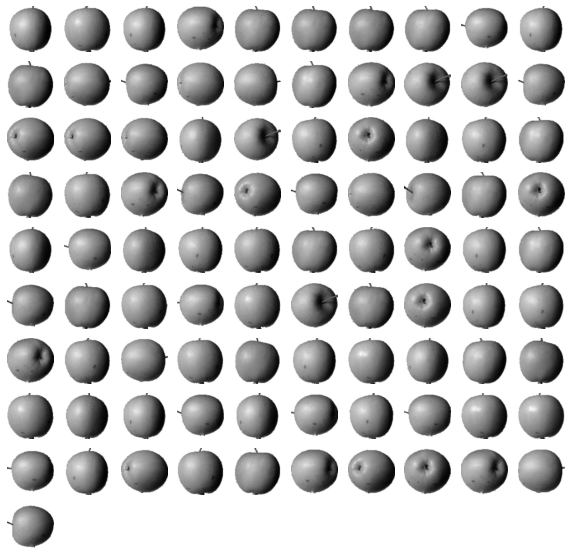

In [27]:
# 속도는 줄였지만 결과값은 동일 
# 대용량 데이터에서 사용 
for label in range(0,3):
    draw_fruits(fruits[km.labels_==label])
    print('\n')

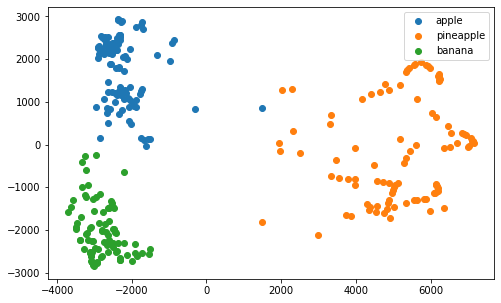

In [31]:
## 클러스터 구성확인 --> 산점도로 시각화하여 확인
plt.figure(figsize = (8,5))
for label in range(0,3):
    data=fruits_pca[km.labels_==label]
    plt.scatter(data[:,0],data[:,1])
   
plt.legend(['apple','pineapple','banana'])
plt.show()

## 로지스틱 회귀모델 적용해 보기 

In [40]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

# 종속변수로 사용할 target 생성 
target = [0]*100 + [1]*100 + [2]*100
df['target'] = target

In [41]:
df

,0,1,2,3,4,5,6,7,8,9,...,9991,9992,9993,9994,9995,9996,9997,9998,9999,target
0,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,0
1,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,0
2,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,0
3,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,0
4,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,1,1,1,1,1,1,1,1,1,3,...,1,1,1,1,1,1,1,1,1,2
296,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,2
297,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,2
298,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,2


In [44]:
## 교차검증으로 성능 최대화
from sklearn.model_selection import cross_validate

scores=cross_validate(lr,fruits_2d,target)

print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.9966666666666667
0.49079155921936035


In [45]:
# 5개의 폴드 
scores

{'fit_time': array([0.69443393, 0.42855906, 0.41623855, 0.4892323 , 0.42549396]),
 'score_time': array([0.00162077, 0.00168705, 0.00152731, 0.00153971, 0.00249362]),
 'test_score': array([1.        , 1.        , 1.        , 0.98333333, 1.        ])}

In [46]:
# 비율로 지정 해줌 50%
pca = PCA(n_components = 0.5)
pca.fit(fruits_2d)

PCA(n_components=0.5)

In [47]:
# n_components_값 찾기 
print(pca.n_components_)

2


In [48]:
### 차원축소
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)

(300, 2)


In [49]:
# 성능 동일 시간 매우 단축! 
# 차원축소 사용 해야 ! 
# 면접질문 빈출! -> 차원축소! 
from sklearn.model_selection import cross_validate

scores=cross_validate(lr,fruits_pca,target)

print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.99
0.02063140869140625


C:\Users\82102\ml\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\82102\ml\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_opt